# Title- Sales Prediction

# Problem Statement

The goal is to forecast product sales based on historical data.
This helps businesses optimize marketing strategies and revenue growth.

# Objective

The goal of this project is to:
Analyze historical customer data to predict car purchase amounts.
Identify key factors influencing sales (e.g., salary, net worth).
Apply machine learning models to make accurate predictions.
Provide insights that help businesses optimize their marketing strategies and sales growth

# Dataset Description

The dataset contains customer-related information to predict car purchase amounts. Key attributes include:

Age – Age of the customer

Annual Salary – Yearly income

Credit Card Debt – Outstanding credit card dues

Net Worth – Total net assets

Car Purchase Amount – Target variable (amount spent on a car)

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dataset Overview

The dataset contains customer information like age, salary, credit card debt, net worth, and car purchase amount (target variable).
Columns removed: customer name, email, and country (as they are irrelevant).

In [2]:
df = pd.read_csv("car_purchasing.csv", encoding='latin1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [3]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [5]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
df.shape

(500, 9)

# Data Preprocessing

Checked for missing values and handled them appropriately.
Feature scaling applied using StandardScaler to normalize data.
Outliers detected using visual methods (histograms, scatter plots)

In [8]:
df.drop(columns=['customer name', 'customer e-mail', 'country'], inplace=True)

In [9]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64


# Exploratory Data Analysis (EDA)

Pairplot: Show relationships between key numerical variables.

Heatmap: Displayed feature correlations to identify important predictors.

Distribution plots: Visualized sales trends and patterns.

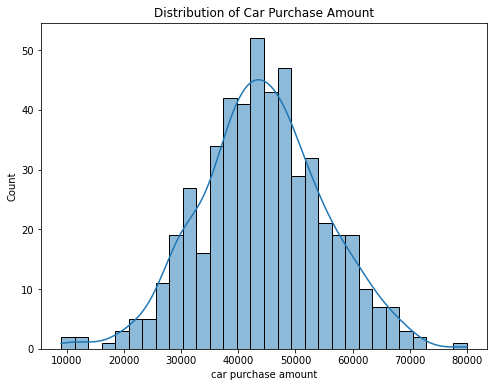

In [10]:
plt.figure(figsize=(8,6))
sns.histplot(df['car purchase amount'], kde=True, bins=30)
plt.title("Distribution of Car Purchase Amount")
plt.show()

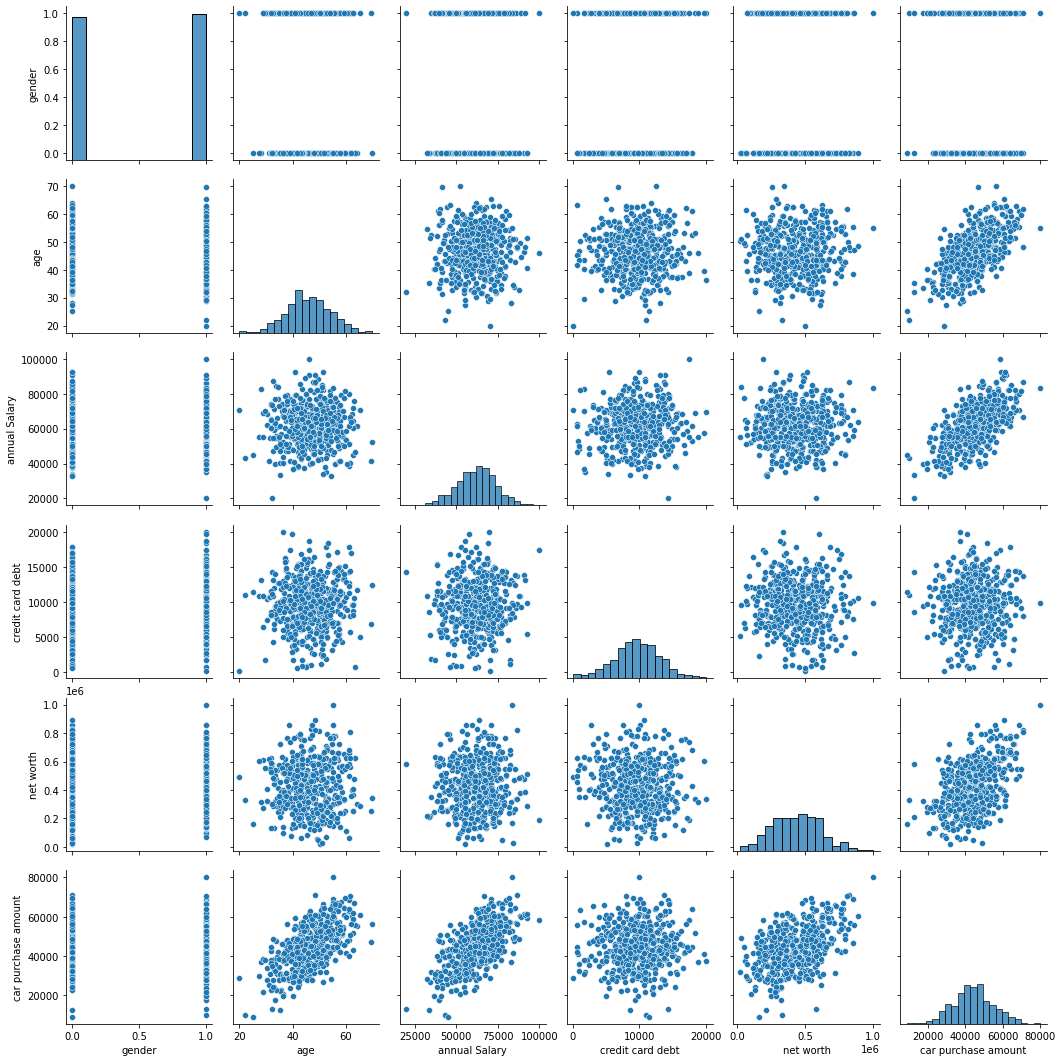

In [11]:
sns.pairplot(df)
plt.show()

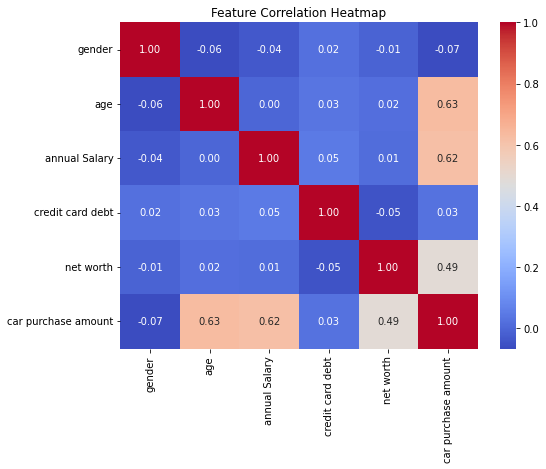

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Model Training & Selection

Split data into training (80%) and testing (20%) sets.

Used Linear Regression to predict car purchase amounts.

Evaluated model using:

Mean Absolute Error (MAE)

Mean Squared Error (MSE)

R² Score for accuracy.

In [13]:
X = df.drop(columns=['car purchase amount'])
y = df['car purchase amount']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test_scaled)

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 1.1535708940209952
Mean Squared Error: 2.0943696029382424
R2 Score: 0.9999999806028682


# Model Performance & Visualization

Scatter Plot: Compared actual vs predicted values.

Residual Distribution Plot: Checked model errors.

Results showed reasonable accuracy but indicated scope for improvement.

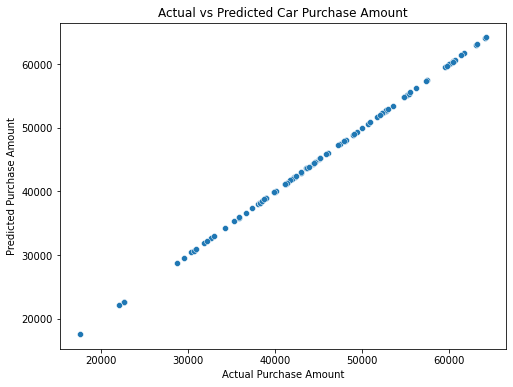

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Actual vs Predicted Car Purchase Amount")
plt.show()

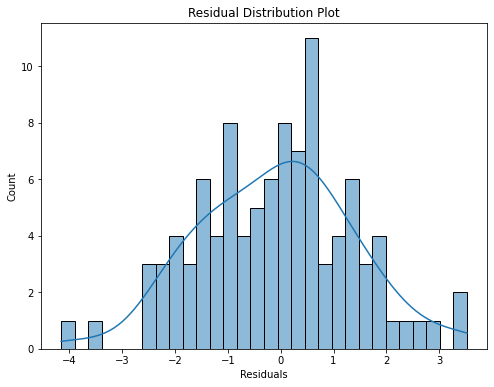

In [20]:
plt.figure(figsize=(8,6))
sns.histplot(y_test - y_pred, kde=True, bins=30)
plt.title("Residual Distribution Plot")
plt.xlabel("Residuals")
plt.show()

# Conclusion

This project demonstrated the impact of income, net worth, and credit card debt on car purchase amounts. While linear regression provided a basic predictive model, it had limitations in handling complex patterns.

To improve accuracy, future work should explore advanced models like Random Forest and XGBoost, incorporate deep learning techniques, and integrate customer behavior insights. Additionally, developing an interactive sales prediction tool can enhance business decision-making.